# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [33]:
bank_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Churn_Modelling.csv?raw=true')

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checkin null values and info of the data

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Visualization

In [6]:
exited_counts = bank_data['Exited'].value_counts()

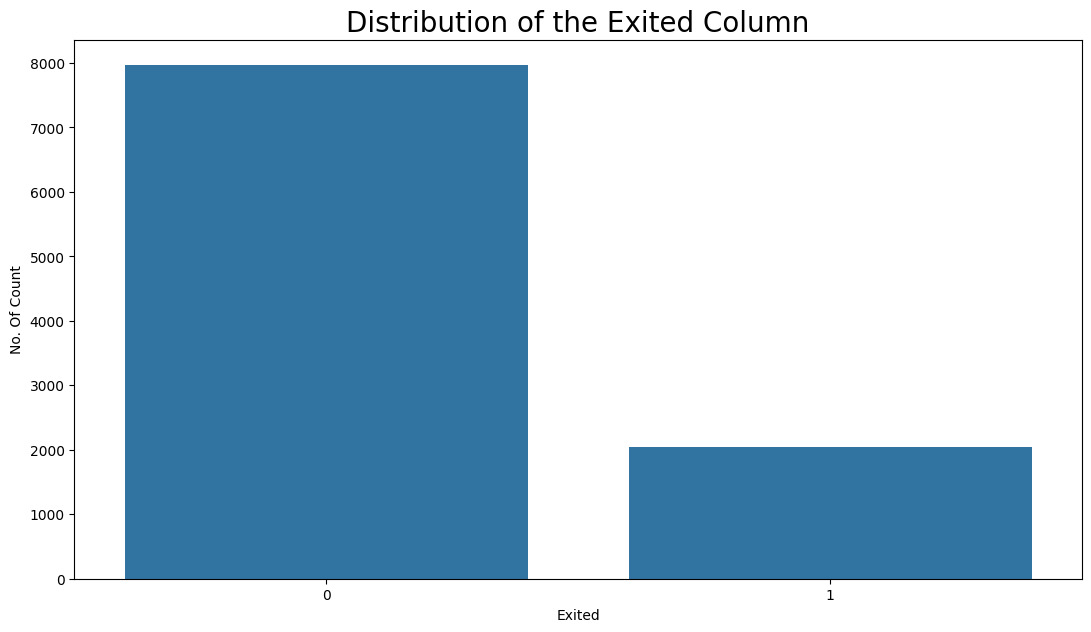

In [7]:
plt.figure(figsize=(13, 7))
sns.barplot(x=exited_counts.index,y=exited_counts)
plt.xlabel('Exited')
plt.ylabel('No. Of Count')
plt.title('Distribution of the Exited Column',size=20)
plt.show()

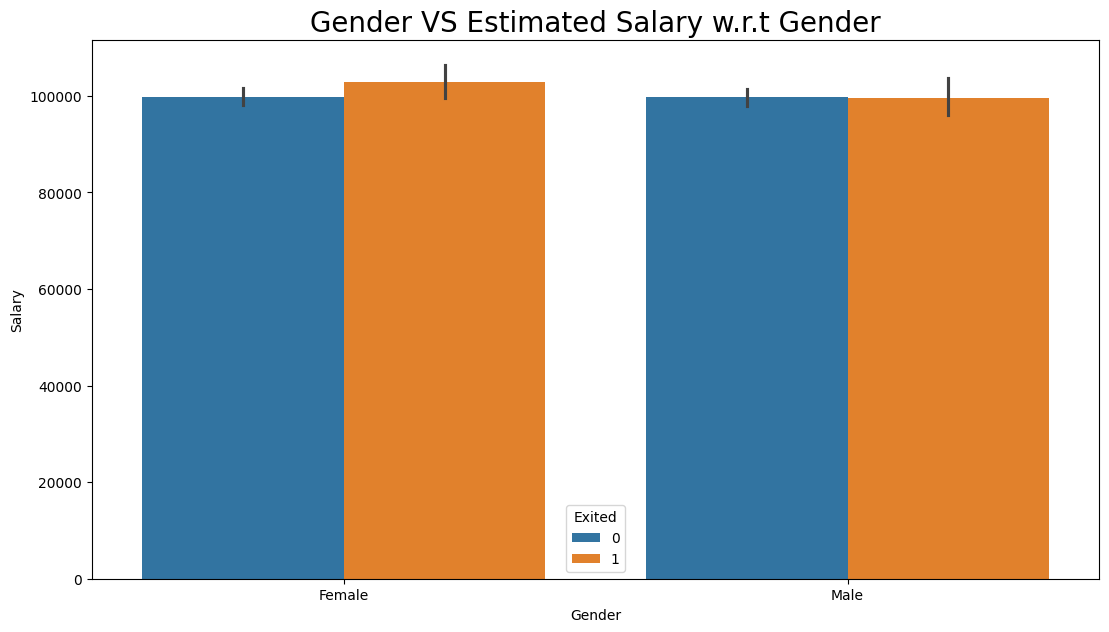

In [8]:
plt.figure(figsize=(13, 7))
sns.barplot(data=bank_data,x='Gender',y='EstimatedSalary',hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Gender VS Estimated Salary w.r.t Gender',size=20)
plt.show()

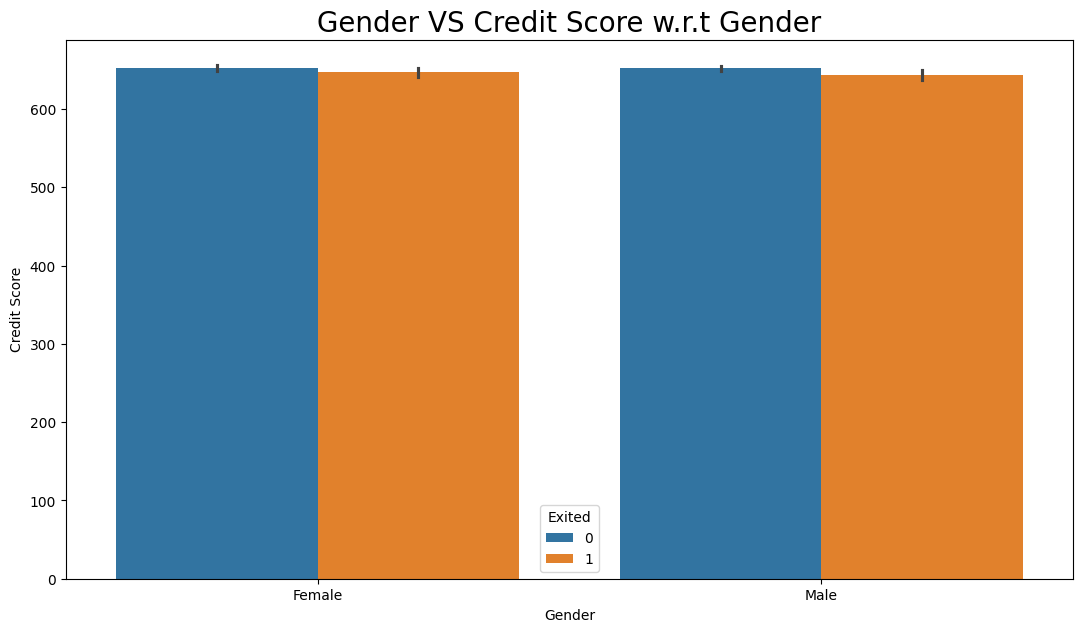

In [9]:
plt.figure(figsize=(13, 7))
sns.barplot(data=bank_data,x='Gender',y='CreditScore',hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.title('Gender VS Credit Score w.r.t Gender',size=20)
plt.show()

# Encoder data

## Applying Label Encoding

In [10]:
bank_data['Gender'] = bank_data['Gender'].map({'Male':0,'Female':1})

## Appyling One Hot Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [12]:
one_hot_encoder.fit(bank_data[['Geography']])

OneHotEncoder()

In [13]:
temp = one_hot_encoder.transform(bank_data[['Geography']]).toarray()

In [14]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [15]:
temp_data = pd.DataFrame(data=temp,columns=['France', 'Germany', 'Spain'],dtype='int')

In [16]:
temp_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [17]:
bank_data = pd.concat([bank_data,temp_data],axis=1)

In [18]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Droping irrelevent columns

In [19]:
bank_data.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [20]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Manually Spliting Our Data Into Training And Testing

Making a dataframe of customers of value exited equal to 1:

In [21]:
bank_exited_1 = bank_data[bank_data['Exited']==1]

Making a dataframe of customers of value exited equal to 1:

In [22]:
bank_exited_0 = bank_data[bank_data['Exited']==0]

Here we are chosing the 80% records who have the value 0 of exited column for training and 20% for testing

In [23]:
train_0 = bank_exited_0.sample(frac=1).iloc[:6371]
test_0 = bank_exited_0.sample(frac=1).iloc[6371:]

Here we are chosing the 80% records who have the value 1 of exited column for training and 20% for testing

In [24]:
train_1 = bank_exited_1.sample(frac=1).iloc[:1630]
test_1 = bank_exited_1.sample(frac=1).iloc[1630:]

Combining train_0 and train_1 to training data

In [25]:
training = pd.concat([train_0,train_1])

Combining test_0 and test_1 to testing data

In [26]:
testing = pd.concat([test_0,test_1])

Spliting our data into trainig and testing w.r.t X and Y

In [27]:
X_train = training.drop('Exited',axis=1)
Y_train = training['Exited']
X_test = testing.drop('Exited',axis=1)
Y_test = testing['Exited']

# Applying Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

## Fitting the model on training data

In [29]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

## Making predictions on testing data

In [30]:
predictions = decision_tree.predict(X_test)

## Checking the model's performance

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1581
           1       0.92      0.89      0.91       418

    accuracy                           0.96      1999
   macro avg       0.95      0.94      0.94      1999
weighted avg       0.96      0.96      0.96      1999



In [32]:
print(confusion_matrix(predictions,Y_test))

[[1548   33]
 [  44  374]]


# Applying Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=41)

## Fitting the model on training data

In [60]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=41)

## Making predictions on testing data

In [61]:
predictions = random_forest.predict(X_test)

## Checking the model's performance

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1606
           1       0.92      0.95      0.93       393

    accuracy                           0.97      1999
   macro avg       0.95      0.97      0.96      1999
weighted avg       0.97      0.97      0.97      1999



In [63]:
print(confusion_matrix(predictions,Y_test))

[[1573   33]
 [  19  374]]


# Finding the best no. of estimator for Random Forest using Elbow Method

In [53]:
error = []

for estimator in range(2,50):
  random_forest = RandomForestClassifier(n_estimators=estimator)
  random_forest.fit(X_train,Y_train)
  predictions = random_forest.predict(X_test)
  error.append(np.mean(predictions!=Y_test))

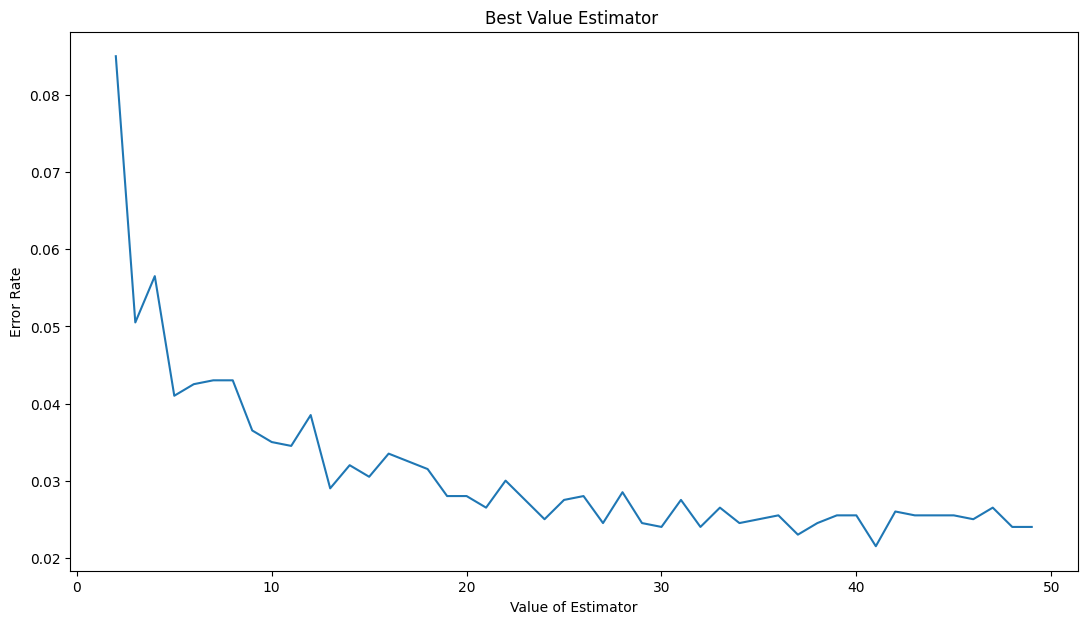

In [58]:
plt.figure(figsize=(13,7))
plt.plot(range(2,50),error)
plt.title('Best Value Estimator ')
plt.xlabel('Value of Estimator')
plt.ylabel('Error Rate')
plt.show()